# Data analysis of Signal Peptides (SPs) 

## 0 Introduction
Inside the cells, the production of mature proteins is achieved through transcription, translation, and modification. However, this process takes place mainly inside the cytosol of the cell, thus thetransportation of proteins into specific areas is facilitated by  short amino acid sequences known as signal peptides. Signal peptides enable intra- and extra- cellular localization of the peptides where after they release the protein sequence to facilitate mature protein formation. 

In general, signal peptides are composed of 15 to 30 amino acids and are located at the N-terminus of the peptide sequence. Besides this, they contain three main regions which are the polar N-region that is used for recognition of signal peptides, hydrophobic H-region which regulates folding of the protein and  transportation across cellular membranes, and C-region which acts as a cleavage site for releasing the mature protein. 

Localization of mature proteins within a cell plays an important role for the regulation of cellular functions. Hence, formation of signal peptide defects can lead to fatal consequences as it cause mislocalization and misfoldeding of proteins within the cell. Besides cellular functions, signal peptides also have substantial importance at regulating the secretion of intracellular proteins such as enzymes, thus making them a valuable mediator for the optimization of industrial fermentation processes. 

Despite their importance, the territory of signal peptides are poorly investigated. This, in part, is due to the need of high prediction power required to cover the combinatorial space of amino acid combinations. For instance, an average-sized signal peptide with 20 amino acids would require consideration of 10^25 potential combinations. However, with the increasing adoption of industrial bioprocesses and development of new approaches such as literate programming and high-throughput analysis, there is an emerging curiousity and competence to investigate potential optimization approaches in signal peptides. 

Hence, motivation of this project is to use machine learning simulations for capturing the important features of singal peptides which can be used for simulation-guided engineering to achieve improved performance and efficiency. Hence, this notebook is dedicated to carry out data analysis in order to process and make the experimental data ready to be used in machine learning simulations so that the underlying features can be captured and used for the engineering of signal peptides.

As a final note, to develop a sense of guidence through the entire process, the project is dedicated to answer the following research questions:

1.	Can we use machine learning simulations to design novel signal peptides for Aspergillus oryzae?

2.	Can we use simulation-guided optimization to outperform the native signal peptides?

3. 	Can we use literate programming and high-throughput technologies to achieve an efficienc experimental design?

### Agenda
- Analyze and summarize statistics of peptide abundancecs from the proteomics data
- Compare proteomics and SignalP outputs to determine the common/unique signal peptides
- Visualize peptide abundance differences between different media compositions (Minimal vs Minimal + Nitrogen) and signal peptide results (Proteomics vs SignalP) 

In [2]:
# Import packages needed for the notebook
from matplotlib import pyplot as plt
from matplotlib_venn import venn2, venn2_circles
import seaborn as sns
import pandas as pd
import numpy as np
import math

## 1 Data

### 1.1 Proteomics data
Proteomics data consist of peptide sequence analysis of supernatants obtained from _Aspergillus_ samples that are grown under two different minimum media compositions (minimum media and minimum media with additional nitrogen). Each media composition was tested with 3 samples and the supernatants of each sample were analyzed through mass spectrometry, thus yielding the proteomics dataframe.

In [3]:
# Read the Excel file into a pandas dataframe 
df_proteomics = pd.read_excel('/Users/lucaslevassor/projects/Signal_peptide_project/data/03_proteomics_data/20221124_FJ_E1200_MWN_15cm_140min_500ng_#1572_proteins.xlsx')
df_proteomics

,Checked,Protein FDR Confidence: Combined,Master,Accession,Description,Exp. q-value: Combined,Sum PEP Score,Coverage [%],# Peptides,# PSMs,...,"Found in Sample: [S23] F23: Sample, 8","Found in Sample: [S24] F24: Sample, 9","Found in Sample: [S25] F25: Sample, 10","Found in Sample: [S26] F26: Sample, 11","Found in Sample: [S27] F27: Sample, 12","Found in Sample: [S28] F28: Sample, 13","Found in Sample: [S29] F29: Sample, 14","Found in Sample: [S30] F30: Sample, 15",# Protein Groups,Modifications
0,False,High,Master Protein,AO090003000935-T-p1,transcript=AO090003000935-T | gene=AO090003000...,0.000,599.687,89,31,7127,...,High,High,High,High,High,High,High,High,1,NaN
1,False,High,Master Protein,AO090023000944-T-p1,transcript=AO090023000944-T | gene=AO090023000...,0.000,523.784,68,32,3237,...,High,High,High,Peak Found,Peak Found,High,High,High,1,NaN
2,False,High,Master Protein,AO090003001591-T-p1,transcript=AO090003001591-T | gene=AO090003001...,0.000,519.742,68,33,2987,...,High,High,Not Found,Not Found,Not Found,High,High,High,1,NaN
3,False,High,Master Protein,RFP_Fusion,RFP_Fusion,0.000,450.464,64,35,398,...,High,Peak Found,High,Peak Found,High,High,High,High,1,NaN
4,False,High,Master Protein,AO090005001300-T-p1,transcript=AO090005001300-T | gene=AO090005001...,0.000,384.472,90,45,554,...,High,High,High,High,High,High,High,High,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,False,Medium,Master Protein,AO090001000075-T-p1,transcript=AO090001000075-T | gene=AO090001000...,0.044,1.795,4,1,1,...,Not Found,Peak Found,Peak Found,Peak Found,Peak Found,Peak Found,Peak Found,Peak Found,1,NaN
862,False,Medium,Master Protein,AO090005001355-T-p1,transcript=AO090005001355-T | gene=AO090005001...,0.046,1.790,14,1,1,...,Peak Found,Peak Found,Peak Found,Not Found,Peak Found,Not Found,Peak Found,Not Found,1,NaN
863,False,Medium,Master Protein,AO090003000247-T-p1,transcript=AO090003000247-T | gene=AO090003000...,0.047,1.779,4,1,1,...,Not Found,Peak Found,Peak Found,Peak Found,Peak Found,Not Found,Not Found,Not Found,1,Met-loss [N-Term]
864,False,Medium,Master Protein,AO090001000680-T-p1,transcript=AO090001000680-T | gene=AO090001000...,0.048,1.774,1,1,1,...,Not Found,Not Found,Peak Found,Peak Found,Not Found,Peak Found,High,Peak Found,1,NaN


## 2 Data processing

What are the parameters to isolate? What to keep and why to keep?

### 2.1 Common changes in all datasets

Among all the dataset, accession names serve as a common feature that can be used to connect the datasets, thus meaning all the datasets should be processed to have:
- Common and representative name for the accession columns such as "Accession"
- Common data structure which can be recognized such as accession numbers wihtout the suffix: "-T-p1"

In [4]:
# Remove the suffix from the variables located in the "Accession" columns
df_proteomics['Accession'] = df_proteomics['Accession'].str.replace('-T-p1', '')


### 2.2 Proteomics data processing

In this dataset, some of the important processing steps that need to be taken include:

- Removal of RFP_Fusion (Red Fluorescent Protein) as it is not part of the native protein pool of A. oryzae RIB40
- Isolation of important parameters for analysis such as the columns:
    - **Accession:** Unique identifier that is assigned to the signal peptide sequence 
    - **Abundace:** Raw signal peptide counts that are observed and recorded directly from mass spectrometry analysis 
    - **Abundances (Scaled):** Scaled version of raw singal peptide counts signal peptide counts that are observed from mass spectrometry analysis 

There are multiple columns with the name "Abundance" hence, distinctive patterns needs to be determined to isolate the specific columns. The data for minimum media (MM) and minimum media with additional nitrogen (MM_N) compositions are stored under the column names which show a specific naming pattern such as:

- **Raw signal peptide abundance**
    - Abundance: F16, Abundance: F17, Abundance: F18 - Minimum media (MM)
    - Abundance: F28, Abundance: F29, Abundance: F30 - Minimum media with additional nitrogen (MM_N)
- **Scaled signal peptide abundance**
    - Abundances (Scaled): F16, Abundances (Scaled): F17, Abundances (Scaled): F18 - Minimum media (MM)
    - Abundances (Scaled): F28, Abundances (Scaled): F29, Abundances (Scaled): F30 - Minimum media with additional nitrogen (MM_N)

Hence, the "Scaled" and "Raw" abundace samples can be distinguished with the column pattern names:
- **Pattern 1:** "Abundance: and Scaled"
- **Pattern 2:** "F16, F17, F18, F28, F29, F30"

Lets remove "RFP_Fusion" and create a boolean mask to select dataframe variables according to specific characters they contain in the dataframe such as using "Scaled" to select scaled abundances and "Abundance:" to select raw abundances 

In [5]:
# Remove RFP_Fusion from the dataframe as it is not part of the native protein pool
df_proteomics = df_proteomics[df_proteomics.Accession != 'RFP_Fusion']

# Create a boolean mask that is True for columns that contain the pattaern1: "Scaled, Abundance:" and pattern2: "F16, F17, F18, F28, F29; F30"
pattern1 = 'Abundance:|Scaled'
pattern2 = 'F16|F17|F18|F28|F29|F30'
df_raw_scaled_abundances = df_proteomics.loc[:, df_proteomics.columns.str.contains(pattern1) & df_proteomics.columns.str.contains(pattern2, regex=True)]

# Recall the dataframe to combine accession with ioslated list of columns for the peptide abundances 
df_proteomics_processed = df_proteomics[['Accession']+ list(df_raw_scaled_abundances.columns)]
df_proteomics_processed

,Accession,"Abundances (Scaled): F16: Sample, 1","Abundances (Scaled): F17: Sample, 2","Abundances (Scaled): F18: Sample, 3","Abundances (Scaled): F28: Sample, 13","Abundances (Scaled): F29: Sample, 14","Abundances (Scaled): F30: Sample, 15","Abundance: F16: Sample, 1","Abundance: F17: Sample, 2","Abundance: F18: Sample, 3","Abundance: F28: Sample, 13","Abundance: F29: Sample, 14","Abundance: F30: Sample, 15"
0,AO090003000935,5.4,4.3,7.4,81.0,35.7,77.8,9.597858e+07,9.416572e+07,1.297344e+08,1.888527e+09,1.011602e+09,1.584488e+09
1,AO090023000944,242.7,250.1,258.5,42.9,72.6,45.7,2.378266e+08,3.016177e+08,2.504219e+08,5.514791e+07,1.134059e+08,5.128523e+07
2,AO090003001591,231.8,214.1,244.3,62.8,84.6,60.1,9.888853e+09,1.123887e+10,1.030518e+10,3.511919e+09,5.755309e+09,2.932830e+09
4,AO090005001300,96.3,38.4,17.0,89.7,111.3,82.3,7.204276e+07,3.532077e+07,1.257048e+07,8.793645e+07,1.328252e+08,7.046364e+07
5,AO090010000746,98.6,105.3,113.0,260.9,284.5,247.8,2.367148e+08,3.107989e+08,2.681958e+08,8.206836e+08,1.088923e+09,6.807444e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,AO090001000075,201.7,18.7,NaN,239.4,431.0,261.4,1.819305e+05,2.070978e+04,NaN,2.830392e+05,6.199164e+05,2.698529e+05
862,AO090005001355,64.6,146.2,NaN,NaN,184.2,NaN,2.104682e+04,5.864526e+04,NaN,NaN,9.575187e+04,NaN
863,AO090003000247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864,AO090001000680,NaN,NaN,NaN,250.9,673.0,244.1,NaN,NaN,NaN,5.761538e+04,1.879930e+05,4.894831e+04


In [6]:
# Convert and save a summary dataframe
df_proteomics_processed.to_csv('/Users/lucaslevassor/projects/Signal_peptide_project/data/03_proteomics_data/proteomics_processed.csv', index=False)

## 1 Load processed datasets

In this notebook, proteomics and signalP are going to be the main datasets that will be needed to analyze the observed vs predicted signal peptides, hence, we load these two datasets only 

In [7]:
# Load processed proteomics dataset
df_proteomics = pd.read_csv('/Users/lucaslevassor/projects/Signal_peptide_project/data/03_proteomics_data/proteomics_processed.csv')
df_proteomics

,Accession,"Abundances (Scaled): F16: Sample, 1","Abundances (Scaled): F17: Sample, 2","Abundances (Scaled): F18: Sample, 3","Abundances (Scaled): F28: Sample, 13","Abundances (Scaled): F29: Sample, 14","Abundances (Scaled): F30: Sample, 15","Abundance: F16: Sample, 1","Abundance: F17: Sample, 2","Abundance: F18: Sample, 3","Abundance: F28: Sample, 13","Abundance: F29: Sample, 14","Abundance: F30: Sample, 15"
0,AO090003000935,5.4,4.3,7.4,81.0,35.7,77.8,9.597858e+07,9.416572e+07,1.297344e+08,1.888527e+09,1.011602e+09,1.584488e+09
1,AO090023000944,242.7,250.1,258.5,42.9,72.6,45.7,2.378266e+08,3.016177e+08,2.504219e+08,5.514791e+07,1.134059e+08,5.128523e+07
2,AO090003001591,231.8,214.1,244.3,62.8,84.6,60.1,9.888853e+09,1.123887e+10,1.030518e+10,3.511919e+09,5.755309e+09,2.932830e+09
3,AO090005001300,96.3,38.4,17.0,89.7,111.3,82.3,7.204276e+07,3.532077e+07,1.257048e+07,8.793645e+07,1.328252e+08,7.046364e+07
4,AO090010000746,98.6,105.3,113.0,260.9,284.5,247.8,2.367148e+08,3.107989e+08,2.681958e+08,8.206836e+08,1.088923e+09,6.807444e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
860,AO090001000075,201.7,18.7,NaN,239.4,431.0,261.4,1.819305e+05,2.070978e+04,NaN,2.830392e+05,6.199164e+05,2.698529e+05
861,AO090005001355,64.6,146.2,NaN,NaN,184.2,NaN,2.104682e+04,5.864526e+04,NaN,NaN,9.575187e+04,NaN
862,AO090003000247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
863,AO090001000680,NaN,NaN,NaN,250.9,673.0,244.1,NaN,NaN,NaN,5.761538e+04,1.879930e+05,4.894831e+04


In [8]:
# Load processed signalP dataset
df_signalP = pd.read_csv('/Users/lucaslevassor/projects/Signal_peptide_project/data/03_proteomics_data/ML_signal_peptides.csv')
df_signalP

,Accession,sequence,length,abundance,binary_classification
0,AO090003001591-T-p1,MMVAWWSLFLYGLQVAAPALAA,22,1.000000,1
1,AO090003000935-T-p1,MEAFNLHNFLSSLYILLPFVILANPVHAA,29,0.417923,1
2,AO090103000076-T-p1,MLRVSAIFMACLLLATAAPT,20,0.339312,1
3,AO090026000003-T-p1,MAVRIARFLGLSTVAYLALANGIDAR,26,0.276919,1
4,AO090010000746-T-p1,MVSFSSCLRALALGSSVLAVQPVLRQ,26,0.218331,1
...,...,...,...,...,...
1056,AO090026000252-T-p1,MQVKLFYTLALWAPILVSAQ,20,0.000000,0
1057,AO090026000257-T-p1,MKSLIWALPFIPLAYAN,17,0.000000,0
1058,AO090026000367-T-p1,MWPTRSLSSLFFLSLALGSPVSQT,24,0.000000,0
1059,AO090026000428-T-p1,MLLPRLSSLLCLAGLATMPVANAY,24,0.000000,0


## 2 Statistical analysis of Proteomics data
Different media compositions can influence the gene activity, and thus, the proteomic pool of the fungal cell through epigenetic regulations. Hence, statistical analysis of the two media compoisitons (minimal media and minimal media with additional introgen) can provide information on the influence of nitrogen addition.

In order to achieve this, "Scaled" and "Raw" abundance values can be used to compare the variation observed in the signal peptide abundance under different media compositions through analyzing statistics of different media compositions.

In [9]:
# Use the processed dataframe to isolate the data into categories
MM_scaled = df_proteomics.iloc[:, 1:4]
MM_N_scaled = df_proteomics.iloc[:, 4:7]
MM_raw = df_proteomics.iloc[:, 7:10]
MM_N_raw = df_proteomics.iloc[:, 10:13]

In [10]:
MM_N_raw

,"Abundance: F28: Sample, 13","Abundance: F29: Sample, 14","Abundance: F30: Sample, 15"
0,1.888527e+09,1.011602e+09,1.584488e+09
1,5.514791e+07,1.134059e+08,5.128523e+07
2,3.511919e+09,5.755309e+09,2.932830e+09
3,8.793645e+07,1.328252e+08,7.046364e+07
4,8.206836e+08,1.088923e+09,6.807444e+08
...,...,...,...
860,2.830392e+05,6.199164e+05,2.698529e+05
861,NaN,9.575187e+04,NaN
862,NaN,NaN,NaN
863,5.761538e+04,1.879930e+05,4.894831e+04


In [11]:
# Calculate mean abundances per Accession by using the abundances
MM_scaled_means = df_proteomics['MM mean abundances (Scaled)'] = MM_scaled.mean(axis=1)
MM_N_scaled_means = df_proteomics['MM + Nitrogen mean abundances (Scaled)'] = MM_N_scaled.mean(axis=1)
MM_raw_means = df_proteomics['MM mean abundances (Raw)'] = MM_raw.mean(axis=1)
MM_N_raw_means = df_proteomics['MM + Nitrogen mean abundances (Raw)'] = MM_N_raw.mean(axis=1)

In [12]:
MM_raw_means 

0      1.066262e+08
1      2.632887e+08
2      1.047763e+10
3      3.997800e+07
4      2.719032e+08
           ...     
860    1.013201e+05
861    3.984604e+04
862             NaN
863             NaN
864    2.333389e+05
Length: 865, dtype: float64

In [13]:
# Calculate mean of the means abundances per Accession by using the abundances
MM_scaled_mean_of_means = MM_scaled_means.mean()
MM_N_scaled_mean_of_means = MM_N_scaled_means.mean()
MM_raw_mean_of_means = MM_raw_means.mean()
MM_N_raw_mean_of_means = MM_N_raw_means.mean()

In [14]:
# Calculate the standard deviation between the means of the 3 samples in the same media composition
MM_scaled_std_dev = (MM_scaled_means).std()
MM_N_scaled_std_dev = (MM_N_scaled_means).std()
MM_raw_std_dev = (MM_raw_means).std()
MM_N_raw_std_dev = (MM_N_raw_means).std()

### 2.1 Normalization of peptide abundances
Lets normalize the peptide abundance between 0 and 1 by applying Min-Max normalization (i.e., subtracting the individual variables from the minimum value observed and then dividing by the range, where range is the difference between the maximum and minimum values).

In [15]:
# Apply Min-Max normalization 
MM_scaled_norm = (MM_scaled - MM_scaled.min()) / (MM_scaled.max() - MM_scaled.min())
MM_N_scaled_norm = (MM_N_scaled - MM_N_scaled.min()) / (MM_N_scaled.max() - MM_N_scaled.min())
MM_raw_norm = (MM_raw - MM_raw.min()) / (MM_raw.max() - MM_raw.min())
MM_N_raw_norm = (MM_N_raw - MM_N_raw.min()) / (MM_N_raw.max() - MM_N_raw.min())

In [16]:
# Calculate mean of "Scaled + Normalized" and "Raw + Normalized" abundances per Accession
df_proteomics['MM mean abundances (Scaled-Normalized)'] = MM_N_scaled_norm.mean(axis=1)
df_proteomics['MM + Nitrogen mean abundances (Scaled-Normalized)'] = MM_N_scaled_norm.mean(axis=1)
df_proteomics['MM mean abundances (Raw-Normalized)'] = MM_raw_norm.mean(axis=1)
df_proteomics['MM + Nitrogen mean abundances (Raw-Normalized)'] = MM_N_raw_norm.mean(axis=1)

### 2.2 Results of statistical analysis

In [17]:
# Print dataframe of "Scaled" and "Raw" mean abundances per Accession
df_abundance_means = df_proteomics.loc[:, ['Accession', 'MM mean abundances (Scaled)', 'MM + Nitrogen mean abundances (Scaled)', 'MM mean abundances (Raw)', 'MM + Nitrogen mean abundances (Raw)']] 
df_abundance_means

,Accession,MM mean abundances (Scaled),MM + Nitrogen mean abundances (Scaled),MM mean abundances (Raw),MM + Nitrogen mean abundances (Raw)
0,AO090003000935,5.700000,64.833333,1.066262e+08,1.494872e+09
1,AO090023000944,250.433333,53.733333,2.632887e+08,7.327970e+07
2,AO090003001591,230.066667,69.166667,1.047763e+10,4.066686e+09
3,AO090005001300,50.566667,94.433333,3.997800e+07,9.707511e+07
4,AO090010000746,105.633333,264.400000,2.719032e+08,8.634503e+08
...,...,...,...,...,...
860,AO090001000075,110.200000,310.600000,1.013201e+05,3.909362e+05
861,AO090005001355,105.400000,184.200000,3.984604e+04,9.575187e+04
862,AO090003000247,NaN,NaN,NaN,NaN
863,AO090001000680,NaN,389.333333,NaN,9.818556e+04


In [18]:
# Print dataframe of normalized mean abundances per Accession
df_abundance_means_normalized = df_proteomics.loc[:, ['Accession', 'MM mean abundances (Scaled-Normalized)', 'MM + Nitrogen mean abundances (Scaled-Normalized)', 'MM mean abundances (Raw-Normalized)', 'MM + Nitrogen mean abundances (Raw-Normalized)']]
df_abundance_means_normalized 

,Accession,MM mean abundances (Scaled-Normalized),MM + Nitrogen mean abundances (Scaled-Normalized),MM mean abundances (Raw-Normalized),MM + Nitrogen mean abundances (Raw-Normalized)
0,AO090003000935,0.059285,0.059285,0.010224,0.417923
1,AO090023000944,0.044270,0.044270,0.025062,0.017628
2,AO090003001591,0.058537,0.058537,1.000000,1.000000
3,AO090005001300,0.080759,0.080759,0.003882,0.024045
4,AO090010000746,0.228295,0.228295,0.025872,0.218331
...,...,...,...,...,...
860,AO090001000075,0.254802,0.254802,0.000010,0.000090
861,AO090005001355,0.122683,0.122683,0.000003,0.000015
862,AO090003000247,NaN,NaN,NaN,NaN
863,AO090001000680,0.309596,0.309596,NaN,0.000019


In [19]:
# Merge and print dataframes of mean abundances per Accession before and after normalization
df_merged_abundance_means = pd.merge(df_abundance_means, df_abundance_means_normalized, on='Accession')

# Select and print the desired parameters
df_merged_abundance_means = df_merged_abundance_means[['Accession', 
'MM mean abundances (Scaled)', 'MM mean abundances (Scaled-Normalized)', 
'MM + Nitrogen mean abundances (Scaled)', 'MM + Nitrogen mean abundances (Scaled-Normalized)', 
'MM mean abundances (Raw)', 'MM mean abundances (Raw-Normalized)',
'MM + Nitrogen mean abundances (Raw)', 'MM + Nitrogen mean abundances (Raw-Normalized)']]

df_merged_abundance_means

,Accession,MM mean abundances (Scaled),MM mean abundances (Scaled-Normalized),MM + Nitrogen mean abundances (Scaled),MM + Nitrogen mean abundances (Scaled-Normalized),MM mean abundances (Raw),MM mean abundances (Raw-Normalized),MM + Nitrogen mean abundances (Raw),MM + Nitrogen mean abundances (Raw-Normalized)
0,AO090003000935,5.700000,0.059285,64.833333,0.059285,1.066262e+08,0.010224,1.494872e+09,0.417923
1,AO090023000944,250.433333,0.044270,53.733333,0.044270,2.632887e+08,0.025062,7.327970e+07,0.017628
2,AO090003001591,230.066667,0.058537,69.166667,0.058537,1.047763e+10,1.000000,4.066686e+09,1.000000
3,AO090005001300,50.566667,0.080759,94.433333,0.080759,3.997800e+07,0.003882,9.707511e+07,0.024045
4,AO090010000746,105.633333,0.228295,264.400000,0.228295,2.719032e+08,0.025872,8.634503e+08,0.218331
...,...,...,...,...,...,...,...,...,...
860,AO090001000075,110.200000,0.254802,310.600000,0.254802,1.013201e+05,0.000010,3.909362e+05,0.000090
861,AO090005001355,105.400000,0.122683,184.200000,0.122683,3.984604e+04,0.000003,9.575187e+04,0.000015
862,AO090003000247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
863,AO090001000680,NaN,0.309596,389.333333,0.309596,NaN,NaN,9.818556e+04,0.000019


In [20]:
# Convert and save a summary dataframe (.csv or .xlsx)
df_merged_abundance_means.to_csv('/Users/lucaslevassor/projects/Signal_peptide_project/data/03_proteomics_data/proteomics_mean_peptide_abundances.csv', index=False)

### 2.3 Two-sample t-test

Different media compositions can trigger epigenetic mechanism to alter gene expression in the fugal cells, thus, implementation of different minimal media (MM and MM_N) can have significant influence in the protein pool compositions/abundance obtained, as illustrated by the bar plots in the previous sub-section. However, since the standard deviation of the values are too large, it is difficult to derive conclusion from the bar plots. In order to solve this problem, two-sampled t-test can be used to compare the means of the two independent sample groups (in this case, MM and MM_N) to derive an explicit conclusion regarding to the significance of nitrogen addition.
 
For this case, lets use the significance level (alpha) of 0.05.

For alpha = 0.05, the hypothesis are:
- Null hypothesis (H0): Independent sample means are equal
- Alternative hypothesis (Ha): Independent sample means are not equal

In [21]:
# Remove the NaN values from the data for calculation
MM_raw_means_wo_nan = MM_raw_means.dropna()
MM_N_raw_means_wo_nan = MM_N_raw_means.dropna()

# Print the number of variables left after dropping NaN values
print('Number of non-NaN variables in MM_raw_means:', len(MM_raw_means_wo_nan))
print('Number of non-NaN variables in MM_N_raw_means:', len(MM_N_raw_means_wo_nan))

Number of non-NaN variables in MM_raw_means: 546
Number of non-NaN variables in MM_N_raw_means: 828


In [22]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(MM_N_raw_means_wo_nan, MM_raw_means_wo_nan)
print("T-statistic value:", t_stat)
print("p_value:", p_value)

T-statistic value: -0.32739944566182605
p_value: 0.7434157324050669


The t-statistics value indicates the difference between the groups, whereas the p-value indicates the likelihood of observing a t-statistic value as extreme or more extreme than the observed value under H0.

- p-value equal or below the significance level (p-value <= alpha = 0.05) indicates that the observed difference between groups is unlikely to have occurred by chance alone, thus providing evidence to rejecting the H0.
- p-value higher than the significance level (p-value > alpha = 0.05) suggests that the difference observed between groups could by chance alone, and thus, there is not enough evidence to reject H0.

Hence, for null hypothesis (H0) at alpha = 0.05:

- If p-value <= alpha - Reject H0
- If p-value > alpha - Fail to reject H0

In this case, t-statistic = 0.2518 suggest that the difference between the two groups is not very large, and p-value = 0.8012 indicates that there is high probability to observe a t-statistic value as extreme or more extreme. 

In addition, the outcome (p-value = 0.8012 > alpha = 0.05) suggests that we failed to reject the null hypothesis. In other words, there is not enough evidence to conclude that there is a statistically significant difference between the independent groups means.

### 2.3 Visualization of statistical analysis

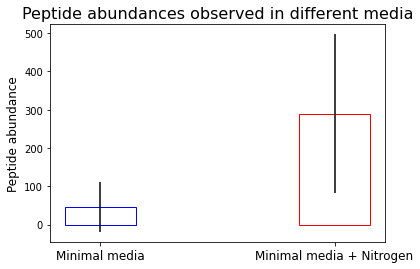

In [23]:
# Set width of each bar
bar_width = 0.3

fig, ax = plt.subplots()
rects1 = ax.bar(1, MM_scaled_mean_of_means, bar_width, yerr=MM_scaled_std_dev, 
                color='none', edgecolor='blue', label='MM_scaled')
rects2 = ax.bar(2, MM_N_scaled_mean_of_means, bar_width, yerr=MM_N_scaled_std_dev, 
                color='none', edgecolor='red', label='MM_N_scaled')

# Set plot parameters
ax.set_title('Peptide abundances observed in different media', fontsize = 16)
ax.set_xticks([1, 2])
ax.set_xticklabels(['Minimal media', 'Minimal media + Nitrogen'], fontsize = 12)
ax.set_ylabel('Peptide abundance', fontsize  = 12)
ax.xaxis.set_ticks
ax.legend().set_visible(False)

plt.show()

## 3 Comparison of Proteomics and SignalP data
The main focus of this section is to cross-reference signal peptides predicted by signalP algorithm with the proteomics results and generate a dataframe with specific parameters such as:
- Accession
- Mean peptide abundances
- Peptide sequence
- Signal peptide likelyhood

By doing this, we are aiming to identify and isolate signal peptides that are common (located in both proteomics and signalP) and unique (located only in signalP). The resulting set of signal peptides than can be ready to use for machine learning operations, where the common signal peptide set will carry the significant features desired to be captured, and unique signal peptide set will carry the insignificant features to be avoided.

In [24]:
# Lets load in the signalP dataset 
df_signalP = pd.read_excel('/Users/lucaslevassor/projects/Signal_peptide_project/data/02_all_signal_peptides/sigpep_predict.xlsx')

# Change the name of the accesion column in the dataframes into "Accession" 
df_signalP = df_signalP.rename(columns={'gene': 'Accession'})

# Remove the suffix from the variables located in the "Accession" columns
df_signalP['Accession'] = df_signalP['Accession'].str.replace('-T-p1', '')
df_signalP

,Unnamed: 0,Accession,start_pos,end_pos,signal_peptide_likelyhood,sequence
0,0,AO090005000016,0,25,0.999803,MAPSHSFMLFLSVICTHLCSLVVAV
1,3,AO090005000029,0,25,0.999835,MHLRNIVIALAATAVASPVDLQDRQ
2,6,AO090005000042,0,25,0.999843,MKASFISRLLSLTAFAISSNLSYGL
3,9,AO090005000053,0,43,0.854809,MGLFLTALGALSSVNVLYSRGRMPLKHLATLLCALSPTVALSQ
4,12,AO090005000059,0,20,0.999821,MHLQATLAVGLSLLGLTLAD
...,...,...,...,...,...,...
1056,3168,AO090103000483,0,21,0.833106,MKTSFLLAAIGFLYRLPCSAA
1057,3171,AO090103000487,0,21,0.999710,MTRYLSFLFLLILFGNSVFTA
1058,3174,AO090103000493,0,19,0.999791,MRGIVALSFLSVALGVTAD
1059,3177,AO090701000994,0,20,0.999845,MRLLLIAPLFSAVSYGAQAT


In [25]:
# Reset the index of the dataframe (df_signalp) and save as processed dataframe (df_signalpp)
df_signalPP = df_signalP.reset_index()
# Change the name of the "gene" in the df_signalp dataframe into "Accession" in the df_signalpp
# This will allow us to merge the df_proteomics and df_singalpp on a specific parameter such as "Accession"
df_signalPP = df_signalP.rename(columns={'gene': 'Accession', 'sequence': 'Peptide sequences', 'signal_peptide_likelyhood': 'Propability for correct peptide identification'})
# 'Propability for correct peptide identification' --> Shows the likelihood of having the sequence being cut at final amino acid location shown on the 'Peptide sequences'

# Merge the dataframes (df_proteomics and df_singalpp)
# The resulting dataframe(df_merged_prosig) contains only the variables matching among the two dataframes
df_merged_proteomics_signalP = pd.merge(df_merged_abundance_means, df_signalPP, on='Accession')

# Select and print the desired parameters
df_merged_proteomics_signalPP = df_merged_proteomics_signalP[['Accession',  
'MM mean abundances (Scaled)', 'MM mean abundances (Scaled-Normalized)', 
'MM + Nitrogen mean abundances (Scaled)', 'MM + Nitrogen mean abundances (Scaled-Normalized)', 
'MM mean abundances (Raw)', 'MM mean abundances (Raw-Normalized)',
'MM + Nitrogen mean abundances (Raw)', 'MM + Nitrogen mean abundances (Raw-Normalized)', 
'Peptide sequences', 'Propability for correct peptide identification']]
df_merged_proteomics_signalPP

,Accession,MM mean abundances (Scaled),MM mean abundances (Scaled-Normalized),MM + Nitrogen mean abundances (Scaled),MM + Nitrogen mean abundances (Scaled-Normalized),MM mean abundances (Raw),MM mean abundances (Raw-Normalized),MM + Nitrogen mean abundances (Raw),MM + Nitrogen mean abundances (Raw-Normalized),Peptide sequences,Propability for correct peptide identification
0,AO090003000935,5.700000,0.059285,64.833333,0.059285,1.066262e+08,0.010224,1.494872e+09,0.417923,MEAFNLHNFLSSLYILLPFVILANPVHAA,0.999834
1,AO090023000944,250.433333,0.044270,53.733333,0.044270,2.632887e+08,0.025062,7.327970e+07,0.017628,MMVAWWSLFLYGLQVAAPALAA,0.999845
2,AO090003001591,230.066667,0.058537,69.166667,0.058537,1.047763e+10,1.000000,4.066686e+09,1.000000,MMVAWWSLFLYGLQVAAPALAA,0.999866
3,AO090010000746,105.633333,0.228295,264.400000,0.228295,2.719032e+08,0.025872,8.634503e+08,0.218331,MVSFSSCLRALALGSSVLAVQPVLRQ,0.999747
4,AO090026000003,0.833333,0.414383,470.100000,0.414383,1.498718e+06,0.000144,1.061096e+09,0.276919,MAVRIARFLGLSTVAYLALANGIDAR,0.848574
...,...,...,...,...,...,...,...,...,...,...,...
251,AO090020000279,NaN,0.092233,105.500000,0.092233,NaN,NaN,1.733149e+05,0.000044,MKVQHLSSPFLLFLLPAIATAL,0.999775
252,AO090011000174,NaN,0.310975,364.966667,0.310975,NaN,NaN,2.159021e+05,0.000049,MQLLPVALLLGALAAPTASE,0.999818
253,AO090023000365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MRDFLSLLGLASIIASSSAA,0.999822
254,AO090010000562,80.633333,0.045944,57.833333,0.045944,5.244993e+04,0.000005,4.827228e+04,0.000009,MILGLIASLGQAAVAAAA,0.999807


In [26]:
# Reset the index of the dataframe (df_signalp) and save as processed dataframe (df_signalpp)
df_signalPP = df_signalP.reset_index()

# Change the name of the "gene" in the df_signalp dataframe into "Accession" in the df_signalpp
df_signalPP = df_signalP.rename(columns={'gene': 'Accession', 'sequence': 'Peptide sequences', 'signal_peptide_likelyhood': 'Propability for correct peptide identification'})

# Merge the dataframes to include only the variables matching among the two dataframes
df_common_peptides_signalP = pd.merge(df_merged_abundance_means, df_signalPP, on='Accession')

# Create a new column that sorts the accession in a descending order to abundances observed in the raw data column
df_common_peptides_signalP['max_abundance'] = df_common_peptides_signalP[['MM mean abundances (Raw)', 'MM + Nitrogen mean abundances (Raw)']].max(axis=1)
df_common_peptides_signalPP = df_common_peptides_signalP.sort_values(by='max_abundance', ascending=False)

df_common_peptides_signalPP

,Accession,MM mean abundances (Scaled),MM mean abundances (Scaled-Normalized),MM + Nitrogen mean abundances (Scaled),MM + Nitrogen mean abundances (Scaled-Normalized),MM mean abundances (Raw),MM mean abundances (Raw-Normalized),MM + Nitrogen mean abundances (Raw),MM + Nitrogen mean abundances (Raw-Normalized),Unnamed: 0,start_pos,end_pos,Propability for correct peptide identification,Peptide sequences,max_abundance
2,AO090003001591,230.066667,0.058537,69.166667,0.058537,1.047763e+10,1.000000,4.066686e+09,1.000000,954,0,22,0.999866,MMVAWWSLFLYGLQVAAPALAA,1.047763e+10
0,AO090003000935,5.700000,0.059285,64.833333,0.059285,1.066262e+08,0.010224,1.494872e+09,0.417923,807,0,29,0.999834,MEAFNLHNFLSSLYILLPFVILANPVHAA,1.494872e+09
17,AO090103000076,0.700000,0.430035,472.900000,0.430035,1.496427e+06,0.000144,1.202415e+09,0.339312,3060,0,20,0.999835,MLRVSAIFMACLLLATAAPT,1.202415e+09
4,AO090026000003,0.833333,0.414383,470.100000,0.414383,1.498718e+06,0.000144,1.061096e+09,0.276919,1203,0,26,0.848574,MAVRIARFLGLSTVAYLALANGIDAR,1.061096e+09
3,AO090010000746,105.633333,0.228295,264.400000,0.228295,2.719032e+08,0.025872,8.634503e+08,0.218331,3033,0,26,0.999747,MVSFSSCLRALALGSSVLAVQPVLRQ,8.634503e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,AO090120000056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1848,0,70,0.505236,MPMPCRTQRYKYCFTVIVCLPYLHLTNFGYLKTNIIPHFSNPNHNS...,NaN
216,AO090701000844,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2175,0,26,0.999802,MHILTPPRLCTALTVLTSLIISSFAI,NaN
225,AO090009000017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,327,0,22,0.999745,MMTKLWMIFGCMAAAFSTATST,NaN
237,AO090026000198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1254,0,20,0.999847,MRFGYALAGILISIAGANAV,NaN


In [27]:
# Fill any NaN values with 0
df_common_peptides_signalPP_wo_NaN = df_common_peptides_signalPP.fillna(0)
df_common_peptides_signalPP_wo_NaN

,Accession,MM mean abundances (Scaled),MM mean abundances (Scaled-Normalized),MM + Nitrogen mean abundances (Scaled),MM + Nitrogen mean abundances (Scaled-Normalized),MM mean abundances (Raw),MM mean abundances (Raw-Normalized),MM + Nitrogen mean abundances (Raw),MM + Nitrogen mean abundances (Raw-Normalized),Unnamed: 0,start_pos,end_pos,Propability for correct peptide identification,Peptide sequences,max_abundance
2,AO090003001591,230.066667,0.058537,69.166667,0.058537,1.047763e+10,1.000000,4.066686e+09,1.000000,954,0,22,0.999866,MMVAWWSLFLYGLQVAAPALAA,1.047763e+10
0,AO090003000935,5.700000,0.059285,64.833333,0.059285,1.066262e+08,0.010224,1.494872e+09,0.417923,807,0,29,0.999834,MEAFNLHNFLSSLYILLPFVILANPVHAA,1.494872e+09
17,AO090103000076,0.700000,0.430035,472.900000,0.430035,1.496427e+06,0.000144,1.202415e+09,0.339312,3060,0,20,0.999835,MLRVSAIFMACLLLATAAPT,1.202415e+09
4,AO090026000003,0.833333,0.414383,470.100000,0.414383,1.498718e+06,0.000144,1.061096e+09,0.276919,1203,0,26,0.848574,MAVRIARFLGLSTVAYLALANGIDAR,1.061096e+09
3,AO090010000746,105.633333,0.228295,264.400000,0.228295,2.719032e+08,0.025872,8.634503e+08,0.218331,3033,0,26,0.999747,MVSFSSCLRALALGSSVLAVQPVLRQ,8.634503e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,AO090120000056,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,1848,0,70,0.505236,MPMPCRTQRYKYCFTVIVCLPYLHLTNFGYLKTNIIPHFSNPNHNS...,0.000000e+00
216,AO090701000844,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,2175,0,26,0.999802,MHILTPPRLCTALTVLTSLIISSFAI,0.000000e+00
225,AO090009000017,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,327,0,22,0.999745,MMTKLWMIFGCMAAAFSTATST,0.000000e+00
237,AO090026000198,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,1254,0,20,0.999847,MRFGYALAGILISIAGANAV,0.000000e+00


# Top 50 MM + Nitrogen mean abundances (Raw) 

In [29]:
df_common_peptides_signalPP_wo_NaN.sort_values(by='MM + Nitrogen mean abundances (Raw)', ascending=False).head(50)


,Accession,MM mean abundances (Scaled),MM mean abundances (Scaled-Normalized),MM + Nitrogen mean abundances (Scaled),MM + Nitrogen mean abundances (Scaled-Normalized),MM mean abundances (Raw),MM mean abundances (Raw-Normalized),MM + Nitrogen mean abundances (Raw),MM + Nitrogen mean abundances (Raw-Normalized),Unnamed: 0,start_pos,end_pos,Propability for correct peptide identification,Peptide sequences,max_abundance
2,AO090003001591,230.066667,0.058537,69.166667,0.058537,1.047763e+10,1.000000,4.066686e+09,1.000000,954,0,22,0.999866,MMVAWWSLFLYGLQVAAPALAA,1.047763e+10
0,AO090003000935,5.700000,0.059285,64.833333,0.059285,1.066262e+08,0.010224,1.494872e+09,0.417923,807,0,29,0.999834,MEAFNLHNFLSSLYILLPFVILANPVHAA,1.494872e+09
17,AO090103000076,0.700000,0.430035,472.900000,0.430035,1.496427e+06,0.000144,1.202415e+09,0.339312,3060,0,20,0.999835,MLRVSAIFMACLLLATAAPT,1.202415e+09
4,AO090026000003,0.833333,0.414383,470.100000,0.414383,1.498718e+06,0.000144,1.061096e+09,0.276919,1203,0,26,0.848574,MAVRIARFLGLSTVAYLALANGIDAR,1.061096e+09
3,AO090010000746,105.633333,0.228295,264.400000,0.228295,2.719032e+08,0.025872,8.634503e+08,0.218331,3033,0,26,0.999747,MVSFSSCLRALALGSSVLAVQPVLRQ,8.634503e+08
20,AO090701001051,28.766667,0.125550,140.033333,0.125550,1.209383e+08,0.011472,7.212312e+08,0.197361,483,0,27,0.999810,MVSFKYLGATAAYILVLASQITTALPV,7.212312e+08
14,AO090011000119,38.600000,0.125439,140.766667,0.125439,9.799470e+07,0.009293,4.346265e+08,0.119362,2652,0,24,0.999816,MRFSAIFTLGLAGTALATPLVERA,4.346265e+08
91,AO090701000295,25.100000,0.057768,64.266667,0.057768,8.256355e+07,0.007850,2.593517e+08,0.071338,2013,0,19,0.999790,MHLPTLVTLACMAVSASAF,2.593517e+08
29,AO090012000708,10.500000,0.107206,117.466667,0.107206,1.564901e+07,0.001493,2.093152e+08,0.060200,1494,0,19,0.999861,MKISAAISTALLAVSAAAF,2.093152e+08
10,AO090102000092,19.566667,0.127019,142.566667,0.127019,2.177916e+07,0.002045,1.898856e+08,0.051181,1599,0,25,0.999810,MKLYLLFFFFLTLHALPGLPRSTAD,1.898856e+08


In [30]:
# Convert and save a summary dataframe (.csv or .xlsx)
df_common_peptides_signalPP_wo_NaN.to_csv('/Users/lucaslevassor/projects/Signal_peptide_project/data/03_proteomics_data/signalP_common_peptides_wo_NaN.csv', index=False)

### 3.1 Visualization of Proteomics SignalP comparison

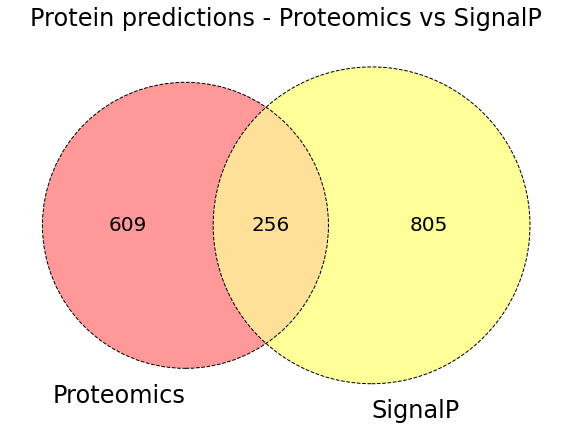

In [31]:
#  Create the subsets
df_proteomics_acc = set(df_proteomics['Accession'])
df_signalPP_acc = set(df_signalPP['Accession'])

# Set the font size before creating any plot elements
plt.rc('font', size=20)

# Create the Venn diagram
subsets = [df_proteomics_acc, df_signalPP_acc]
v = venn2(subsets, set_labels=('Proteomics', 'SignalP'), set_colors=('red', 'yellow'))
c = venn2_circles(subsets, linestyle='dashed', linewidth= 1.0)
plt.title("Protein predictions - Proteomics vs SignalP")
plt.gcf().set_size_inches(10, 8)
plt.show()

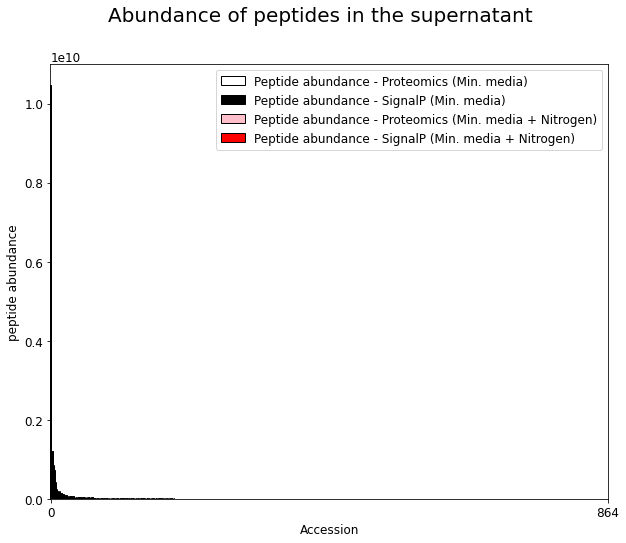

In [32]:
# Rename the "# Peptides" column to indicate which excel file it comes from
df_peptide_count_proteomics = df_merged_abundance_means.rename(columns={'MM mean abundances (Raw)': 'Peptide abundance - Proteomics (Min. media)', 'MM + Nitrogen mean abundances (Raw)': 'Peptide abundance - Proteomics (Min. media + Nitrogen)'})
df_peptide_count_signalP = df_common_peptides_signalPP.rename(columns={'MM mean abundances (Raw)': 'Peptide abundance - SignalP (Min. media)', 'MM + Nitrogen mean abundances (Raw)': 'Peptide abundance - SignalP (Min. media + Nitrogen)'})

# Merge the dataframes on the "Accession" column
df_peptide_count_merged_all = pd.merge(df_peptide_count_proteomics, df_peptide_count_signalP, on='Accession', how='outer')

# Fill any NaN values with 0
df_peptide_count_merged_all = df_peptide_count_merged_all.fillna(0)

# Sort the dataframe by peptide abundances in descending order
all_bars = ['Peptide abundance - Proteomics (Min. media)', 'Peptide abundance - SignalP (Min. media)', 'Peptide abundance - Proteomics (Min. media + Nitrogen)', 'Peptide abundance - SignalP (Min. media + Nitrogen)']
#df_peptide_count_merged_all['total_abundance'] = df_peptide_count_merged_all[all_bars].sum(axis=1)
df_peptide_count_merged_all['max_abundance'] = df_peptide_count_merged_all[all_bars].max(axis=1)
df_peptide_count_merged_max = df_peptide_count_merged_all.sort_values(by=['max_abundance'], ascending=False)

# Set the font size before creating any plot elements
plt.rc('font', size=12)

# Generate the bar plot
df_peptide_count_merged_max.plot(x='Accession', y=all_bars, kind='bar', color=['none', 'black', 'pink', 'red'], edgecolor='black')

ax = plt.gca()
ax.set_xticks([0, df_peptide_count_merged_max.index.get_loc(df_peptide_count_merged_max.index[-1])])
ax.set_xticklabels([0, df_peptide_count_merged_max.index.get_loc(df_peptide_count_merged_max.index[-1])], rotation=0)
ax.figure.suptitle('Abundance of peptides in the supernatant', fontsize=20)
ax.figure.set_size_inches(10, 8)

plt.xlabel('Accession')
plt.ylabel('peptide abundance')
plt.show()

In [33]:
# Take top20
df_top20_min_media_nitrogen = df_peptide_count_merged_max.sort_values('Peptide abundance - SignalP (Min. media + Nitrogen)', ascending=False).head(20)
df_top20_min_media = df_peptide_count_merged_max.sort_values('Peptide abundance - Proteomics (Min. media)', ascending=False).head(20)

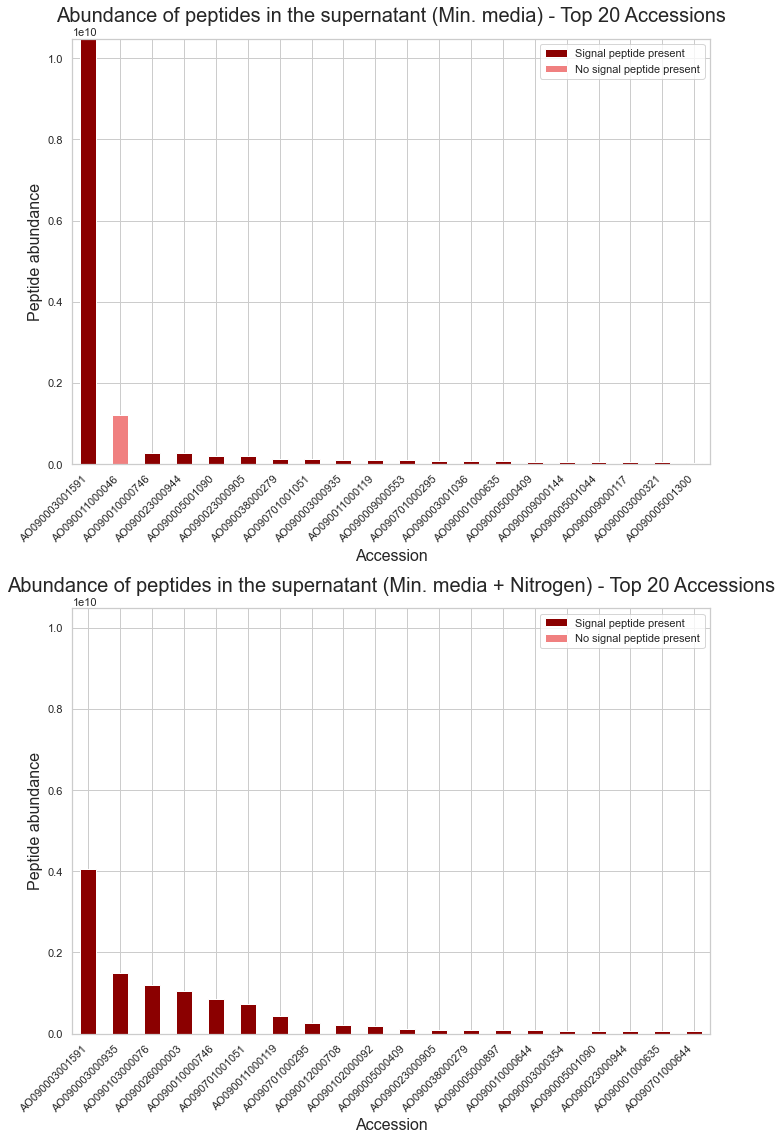

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set plot style
sns.set(style='whitegrid')

# Select the top 20 rows
df_top20 = df_peptide_count_merged_max.head(20)

# Create a new column based on the presence of data in the Proteomics and SignalP categories
def categorize(row, columns):
    if (row[columns[0]] > 0) and (row[columns[1]] > 0):
        return 'Both'
    elif row[columns[0]] > 0:
        return 'Proteomics'
    else:
        return 'None'

# For Min. media
df_top20_min_media['Category_Min_Media'] = df_top20_min_media.apply(categorize, axis=1, columns=['Peptide abundance - Proteomics (Min. media)', 'Peptide abundance - SignalP (Min. media)'])
# For Min. media + Nitrogen
df_top20_min_media_nitrogen['Category_Min_Media_Nitrogen'] = df_top20_min_media_nitrogen.apply(categorize, axis=1, columns=['Peptide abundance - Proteomics (Min. media + Nitrogen)', 'Peptide abundance - SignalP (Min. media + Nitrogen)'])

# Generate the bar plot
fig, axs = plt.subplots(2, 1, figsize=(10, 16))

colors = {'Both':'darkred', 'Proteomics':'lightcoral', 'None':'lightgrey'}

# Determine the y-axis limit by finding the maximum abundance across all categories
y_max = max(df_top20[['Peptide abundance - Proteomics (Min. media)', 'Peptide abundance - Proteomics (Min. media + Nitrogen)']].max())

# For Min. media
df_top20_min_media['Peptide abundance - Proteomics (Min. media)'].plot(kind='bar', ax=axs[0], color=df_top20_min_media['Category_Min_Media'].apply(lambda x: colors[x]))
axs[0].set_xticklabels(df_top20_min_media['Accession'], rotation=45, horizontalalignment='right')
axs[0].set_title('Abundance of peptides in the supernatant (Min. media) - Top 20 Accessions', fontsize=20)
axs[0].set_xlabel('Accession', fontsize=16)
axs[0].set_ylabel('Peptide abundance', fontsize=16)
axs[0].set_ylim([0, y_max])  # Set the y-axis limit

# For Min. media + Nitrogen
df_top20_min_media_nitrogen['Peptide abundance - Proteomics (Min. media + Nitrogen)'].plot(kind='bar', ax=axs[1], color=df_top20_min_media_nitrogen['Category_Min_Media_Nitrogen'].apply(lambda x: colors[x]))
axs[1].set_xticklabels(df_top20_min_media_nitrogen['Accession'], rotation=45, horizontalalignment='right')
axs[1].set_title('Abundance of peptides in the supernatant (Min. media + Nitrogen) - Top 20 Accessions', fontsize=20)
axs[1].set_xlabel('Accession', fontsize=16)
axs[1].set_ylabel('Peptide abundance', fontsize=16)
axs[1].set_ylim([0, y_max])  # Set the y-axis limit

from matplotlib.patches import Patch

# Create legend elements
legend_elements = [Patch(facecolor='darkred', label='Signal peptide present'),
                   Patch(facecolor='lightcoral', label='No signal peptide present')]

# Add the legend to the plot
legend = axs[0].legend(handles=legend_elements, loc='upper right')
legend = axs[1].legend(handles=legend_elements, loc='upper right')



plt.tight_layout()  # This will help to ensure that the plot does not cut off any labels
plt.show()


